In [2]:
import numpy as np
import matplotlib.pyplot as plt
from training import extract_stats

%matplotlib inline

In [42]:
def extract_inner_stats(file):
    f = open(file, 'r')
    names = ['a_st', 'g_st', 'lmbd', 'w_st', 'b_st', 'lr_w', 'lr_b']
    stats = {}
    cnt = 0
    for line in f:
        name = names[cnt]
        if name.split('_')[-1] == 'st':
            curr = []
            for x in line.split(']')[:-1]:
                curr.append(np.array(x.split('[')[1].split(', '), dtype=float))
            curr = np.array(curr)    
        else:
            curr = np.array(line.split(), dtype=float)
        stats[name] = curr
        cnt += 1
    f.close()
    return stats

In [74]:
stats = extract_inner_stats('Kronecker-factored/learning_rate_update_according_to_rules/00/inner_stats.txt')
stats.keys()

dict_keys(['a_st', 'g_st', 'lmbd', 'w_st', 'b_st', 'lr_w', 'lr_b'])

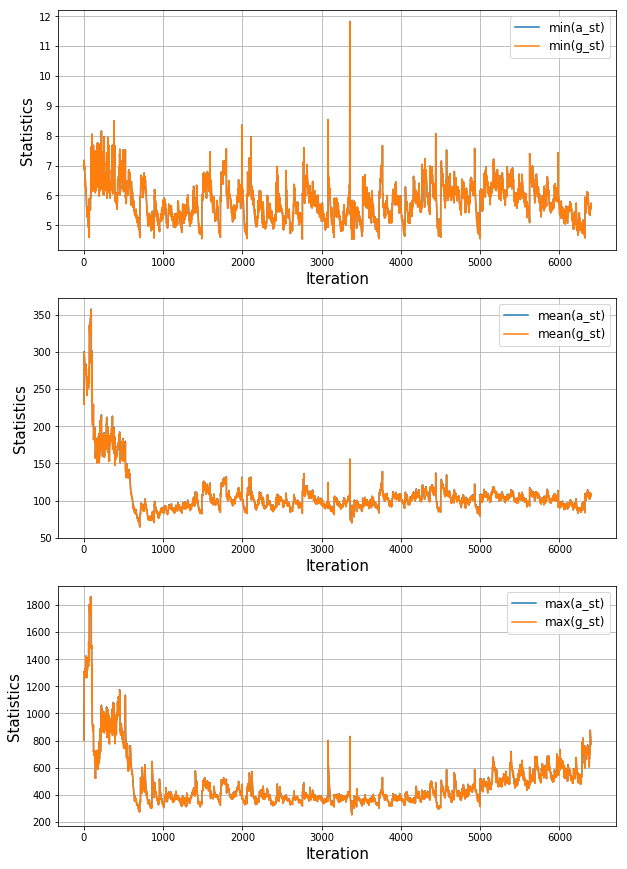

In [57]:
plt.figure(figsize=(10, 15))
grid = np.arange(len(stats['a_st']))

labels = ['min', 'mean', 'max']
for i in range(3):
    plt.subplot(3, 1, 1+i)
    plt.plot(grid, stats['a_st'][:, i], label=labels[i]+'(a_st)')
    plt.plot(grid, stats['g_st'][:, i], label=labels[i]+'(g_st)')
    plt.legend(fontsize='large')
    plt.grid()
    plt.xlabel('Iteration', fontsize=15)
    plt.ylabel('Statistics', fontsize=15)

plt.show()

In [62]:
1./4. * 100, 1./8. * 100, 1./300. * 100, 1./600. * 100

(25.0, 12.5, 0.33333333333333337, 0.16666666666666669)

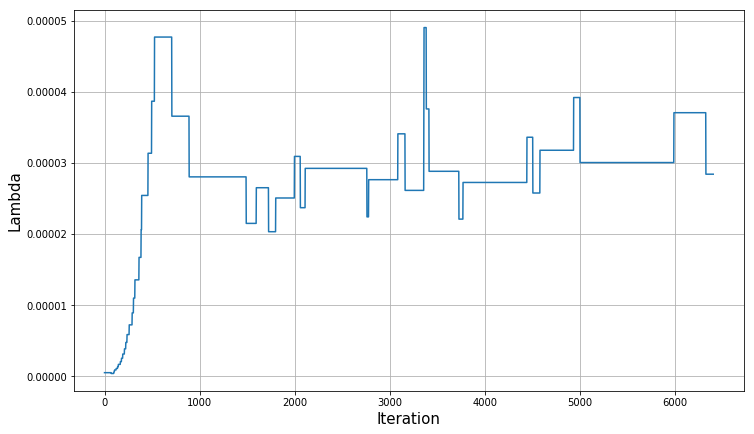

In [59]:
plt.figure(figsize=(12, 7))
plt.plot(grid, stats['lmbd'][:-1])
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Lambda', fontsize=15)
plt.grid()
plt.show()

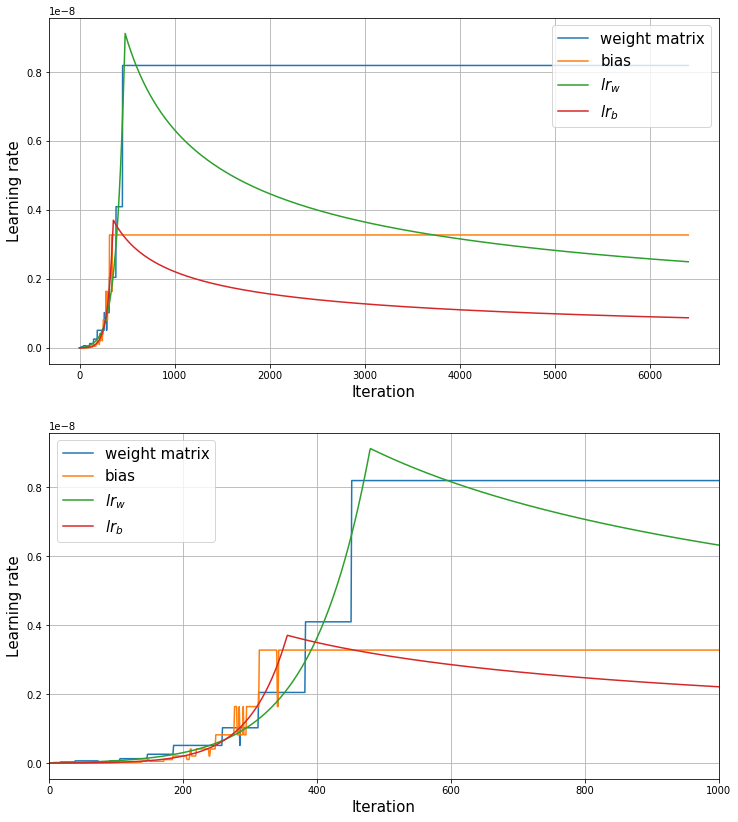

In [77]:
plt.figure(figsize=(12, 14))
grid = np.arange(len(stats['lr_w']))

plt.subplot(2, 1, 1)
plt.plot(grid, stats['lr_w'], label='weight matrix')
plt.plot(grid, stats['lr_b'], label='bias')
plt.plot(grid, np.minimum(1e-12 * (grid+1)**0.7 * np.exp(grid * 1. * 1e-2), 2e-7 / (grid+1)**0.5), label='$lr_{w}$')
plt.plot(grid, np.minimum(5e-14 * (grid+1)**1. * np.exp(grid * 1.5 * 1e-2), 7e-8 / (grid+1)**0.5), label='$lr_{b}$')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Learning rate', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(grid, stats['lr_w'], label='weight matrix')
plt.plot(grid, stats['lr_b'], label='bias')
plt.plot(grid, np.minimum(1e-12 * (grid+1)**0.7 * np.exp(grid * 1. * 1e-2), 2e-7 / (grid+1)**0.5), label='$lr_{w}$')
plt.plot(grid, np.minimum(5e-14 * (grid+1)**1. * np.exp(grid * 1.5 * 1e-2), 7e-8 / (grid+1)**0.5), label='$lr_{b}$')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Learning rate', fontsize=15)
plt.xlim([0, 1000])
plt.show()

In [78]:
dt = extract_stats('Kronecker-factored/learning_rate_update_according_to_rules/00/stats.txt', bd=0.)
dt_func = extract_stats('Kronecker-factored/learning_rate_update_according_to_function/00/stats.txt', bd=0.)

In [79]:
def compose_stats(stats, count):
    composed_stats = {}
    for key in ['entropy', 'sm_entropy', 'accuracy']:
        curr = []
        for i in range(0, len(stats[key]), count):
            curr.append(np.mean(stats[key][i:i+count]))
        composed_stats[key] = curr
    curr = []
    for i in range(0, len(stats['time']), count):
        curr.append(np.sum(stats['time'][i:i+count]))
    composed_stats['time'] = curr
    return composed_stats

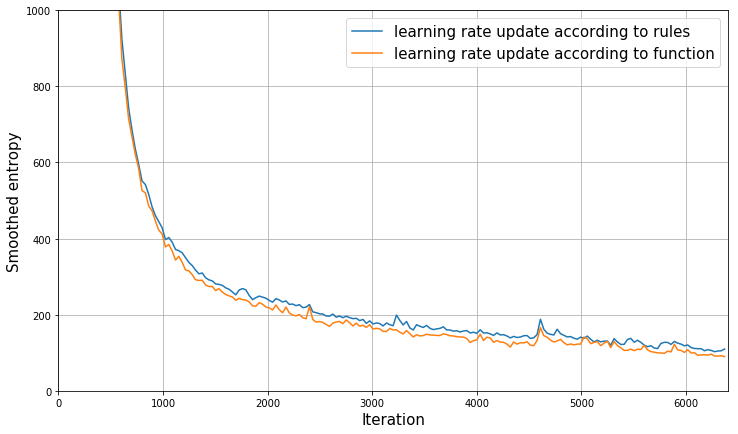

In [84]:
count = 32
dt2 = compose_stats(dt, count)
dt_func2 = compose_stats(dt_func, count)

plt.figure(figsize=(12, 7))
grid = np.arange(len(dt2['sm_entropy']))
plt.plot(grid*count, dt2['sm_entropy'], label='learning rate update according to rules')
plt.plot(grid*count, dt_func2['sm_entropy'], label='learning rate update according to function')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Smoothed entropy', fontsize=15)
plt.legend(fontsize=15)
plt.ylim([0, 1000])
plt.xlim([0, 6400])
plt.grid()
plt.show()

In [94]:
path = 'Kronecker-factored/learning_rate_update_according_to_rules/'
count = 32
dt_00 = compose_stats(extract_stats(path + '00/stats.txt', bd=0.), count)
dt_85 = compose_stats(extract_stats(path + '85/stats.txt', bd=0.), count)
dt_90 = compose_stats(extract_stats(path + '90/stats.txt', bd=0.), count)
dt_95 = compose_stats(extract_stats(path + '95/stats.txt', bd=0.), count)

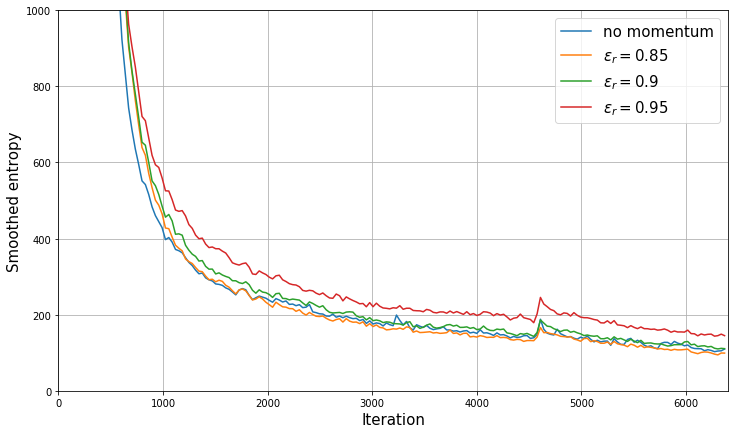

In [95]:
plt.figure(figsize=(12, 7))
grid = np.arange(len(dt_00['sm_entropy']))
names = ['no momentum', '$\epsilon_r = 0.85$', '$\epsilon_r = 0.9$', '$\epsilon_r = 0.95$']
for i, x in enumerate([dt_00, dt_85, dt_90, dt_95]):
    plt.plot(grid*count, x['sm_entropy'], label=names[i])
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Smoothed entropy', fontsize=15)
plt.legend(fontsize=15)
plt.ylim([0, 1000])
plt.xlim([0, 6400])
plt.grid()
plt.show()

In [96]:
32 * 32

1024

In [98]:
count = 32
dt2 = extract_stats('Kronecker-factored/learning_rate_update_according_to_rules/00/stats.txt', bd=0.)
dt2 = compose_stats(dt2, count)
dt_adam = extract_stats('Adam/Adam(nobias_in_multihead).txt')
dt2.keys(), dt_adam.keys()

(dict_keys(['entropy', 'sm_entropy', 'accuracy', 'time']),
 dict_keys(['sm_entropy', 'entropy', 'accuracy', 'time']))

In [103]:
len(grid), len(grid2)

(200, 1461)

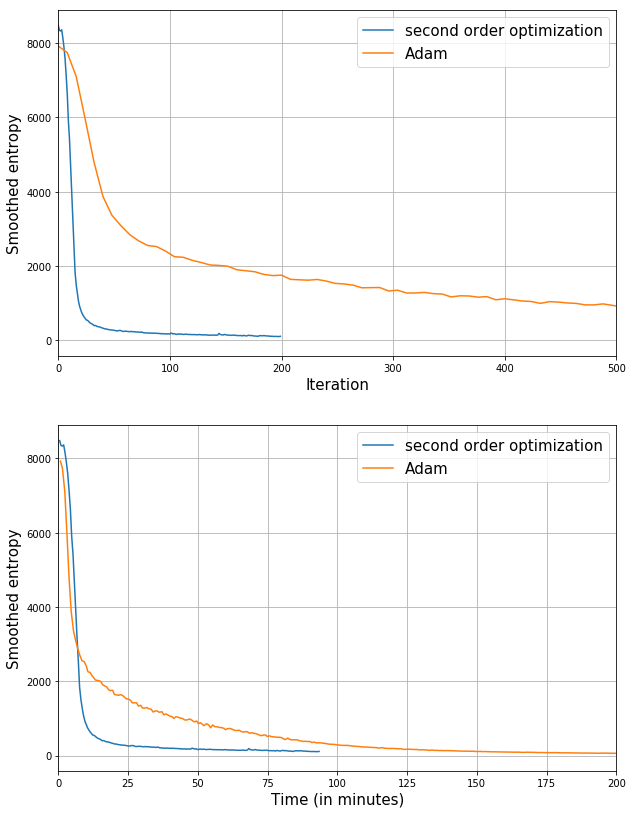

In [118]:
plt.figure(figsize=(10, 14))
plt.subplot(2, 1, 1)
grid2 = np.arange(len(dt2['sm_entropy']))
grid_adam = np.arange(len(dt_adam['sm_entropy'])) * 8
plt.plot(grid2, dt2['sm_entropy'], label='second order optimization')
plt.plot(grid_adam, dt_adam['sm_entropy'], label='Adam')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Smoothed entropy', fontsize=15)
plt.legend(fontsize=15)
plt.xlim([0, 500])
plt.grid()

plt.subplot(2, 1, 2)
grid2 = np.cumsum(dt2['time']) / 60. 
grid_adam = np.cumsum(dt_adam['time']) / 60. 
plt.plot(grid2, dt2['sm_entropy'], label='second order optimization')
plt.plot(grid_adam, dt_adam['sm_entropy'], label='Adam')
plt.xlabel('Time (in minutes)', fontsize=15)
plt.ylabel('Smoothed entropy', fontsize=15)
plt.legend(fontsize=15)
#plt.ylim([0, 1000])
plt.xlim([0, 200])
plt.grid()
plt.show()